Train size: 120, Test size: 30
Class distribution in train: [40 40 40]
Class distribution in test : [10 10 10]

--- LINEAR SVM ---
Accuracy       : 1.000000
Precision (mac): 1.000000
Recall    (mac): 1.000000
F1-score  (mac): 1.000000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- POLY_DEG3 SVM ---
Accuracy       : 0.966667
Precision (mac): 0.969697
Recall    (mac): 0.966667
F1-score  (mac): 0.966583
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95     

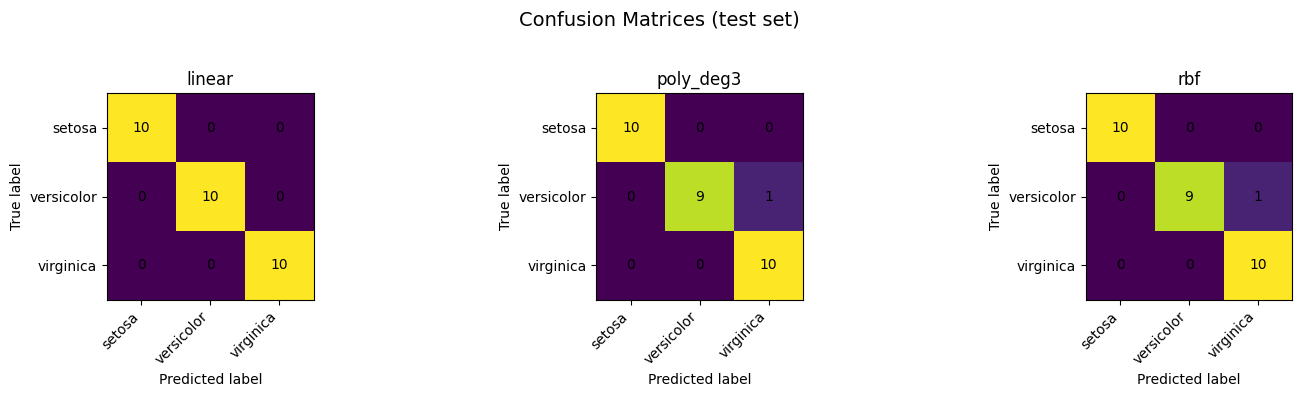

Best kernel by macro F1-score: LINEAR

Summary (sorted by F1 macro):
linear      | Acc: 1.0000  | F1(macro): 1.0000
poly_deg3   | Acc: 0.9667  | F1(macro): 0.9666
rbf         | Acc: 0.9667  | F1(macro): 0.9666


In [1]:
# SVC on Iris (Linear, Poly degree=3, RBF)
# 1) Load, split 80:20
# 2) Train three SVMs (linear, poly d=3, rbf)
# 3) Evaluate: accuracy, precision, recall, f1
# 4) Show confusion matrices
# 5) Print which kernel performed best and why

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import numpy as np


# a) Load dataset and split
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# reproducible split; stratify to keep class proportions (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=42
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
print("Class distribution in train:", np.bincount(y_train))
print("Class distribution in test :", np.bincount(y_test))
print()


# b) Train three SVMs with required kernels
models = {
    'linear': SVC(kernel='linear', random_state=42),
    'poly_deg3': SVC(kernel='poly', degree=3, random_state=42),
    'rbf': SVC(kernel='rbf', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)


# c) Evaluate each model (accuracy, prec, recall, f1)
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cr = classification_report(y_test, y_pred, target_names=target_names)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': acc,
        'precision_macro': prec,
        'recall_macro': rec,
        'f1_macro': f1,
        'confusion_matrix': cm,
        'classification_report': cr
    }

# Print metrics
for name, r in results.items():
    print(f"--- {name.upper()} SVM ---")
    print(f"Accuracy       : {r['accuracy']:.6f}")
    print(f"Precision (mac): {r['precision_macro']:.6f}")
    print(f"Recall    (mac): {r['recall_macro']:.6f}")
    print(f"F1-score  (mac): {r['f1_macro']:.6f}")
    print("Classification Report:")
    print(r['classification_report'])
    print()


# d) Display confusion matrix for each kernel
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Confusion Matrices (test set)", fontsize=14)

for ax, (name, r) in zip(axes, results.items()):
    cm = r['confusion_matrix']
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticks(range(len(target_names)))
    ax.set_yticks(range(len(target_names)))
    ax.set_xticklabels(target_names, rotation=45, ha='right')
    ax.set_yticklabels(target_names)
    # annotate counts
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# e) Identify best performing kernel and why
# Decide by F1-score (macro)
best_kernel = max(results.items(), key=lambda kv: kv[1]['f1_macro'])[0]
print(f"Best kernel by macro F1-score: {best_kernel.upper()}")
print()

# Print numeric summary sorted by f1
print("Summary (sorted by F1 macro):")
for name, r in sorted(results.items(), key=lambda kv: kv[1]['f1_macro'], reverse=True):
    print(f"{name:10s}  | Acc: {r['accuracy']:.4f}  | F1(macro): {r['f1_macro']:.4f}")




- The Iris dataset (with these 4 features) is mostly linearly separable for the three classes,
  so a Linear kernel often performs extremely well and can even reach perfect accuracy with
  a given train/test split and seed.
- Polynomial and RBF kernels are more flexible (can model non-linear boundaries). If the data
  is already linearly separable, extra flexibility can be unnecessary and may slightly
  underperform depending on hyperparameters and the particular train/test split.
- Results depend on the random_state / split. For robust comparison use cross-validation
  (e.g., StratifiedKFold) or GridSearchCV for hyperparameter tuning (C, gamma, degree).

In [2]:
# Train SVM (RBF) with and without StandardScaler on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X = data['data']
y = data['target']

# 2. Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3. SVM WITHOUT feature scaling
svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_unscaled.fit(X_train, y_train)

y_train_pred_unscaled = svm_unscaled.predict(X_train)
y_test_pred_unscaled = svm_unscaled.predict(X_test)

train_acc_unscaled = accuracy_score(y_train, y_train_pred_unscaled)
test_acc_unscaled = accuracy_score(y_test, y_test_pred_unscaled)

# 4. SVM WITH feature scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = svm_scaled.predict(X_train_scaled)
y_test_pred_scaled = svm_scaled.predict(X_test_scaled)

train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

# 5. Prepare summary table
summary = pd.DataFrame({
    'Model': ['SVM (RBF) - Unscaled', 'SVM (RBF) - Scaled (StandardScaler)'],
    'Train Accuracy': [train_acc_unscaled, train_acc_scaled],
    'Test Accuracy': [test_acc_unscaled, test_acc_scaled],
    'Num Support Vectors (sum)': [np.sum(svm_unscaled.n_support_), np.sum(svm_scaled.n_support_)]
})

print("=== Summary of Accuracies ===")
print(summary.to_string(index=False))
print("\n=== Classification Report: Unscaled (Test) ===")
print(classification_report(y_test, y_test_pred_unscaled, target_names=data['target_names']))
print("Confusion matrix (unscaled, test):")
print(confusion_matrix(y_test, y_test_pred_unscaled))

print("\n=== Classification Report: Scaled (Test) ===")
print(classification_report(y_test, y_test_pred_scaled, target_names=data['target_names']))
print("Confusion matrix (scaled, test):")
print(confusion_matrix(y_test, y_test_pred_scaled))

# Save summary to current working directory (works in Colab)
summary.to_csv('svm_scaling_summary.csv', index=False)
print("\nSaved summary to ./svm_scaling_summary.csv")


=== Summary of Accuracies ===
                              Model  Train Accuracy  Test Accuracy  Num Support Vectors (sum)
               SVM (RBF) - Unscaled        0.918681       0.929825                        124
SVM (RBF) - Scaled (StandardScaler)        0.982418       0.982456                         97

=== Classification Report: Unscaled (Test) ===
              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        42
      benign       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix (unscaled, test):
[[36  6]
 [ 2 70]]

=== Classification Report: Scaled (Test) ===
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98      